In [1]:
## pip install openpyxl
## pip install Genderize
## pip install gender-guesser-br
## pip install seaborn

## pip install openpyxl && pip install Genderize && pip install gender-guesser-br && pip install seaborn

In [2]:
import pandas as pd
from genderize import Genderize
from gender_guesser_br import Genero
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotly.express as px


In [3]:
media = 7

## Tratamento e Importação dos Dados

In [4]:
arquivo_ja_tratato = False
if os.path.exists('notas_com_genero.xlsx'):
     df = pd.read_excel('notas_com_genero.xlsx')
     arquivo_ja_tratato = True
else:
     df = pd.read_excel('alunos_nota.xlsx')

print(f'Arquivo já tratado? {arquivo_ja_tratato}')
df = df[df['Nota Prova (sem peso)'].notnull()] #removendo quem não fez a prova

df.shape

Arquivo já tratado? False


(61, 7)

In [ ]:
df

In [25]:
def identificar_genero(nome):
    primeiro_nome = nome.split(' ')[0]

    if primeiro_nome in ['ALISON','ALISSON','ANTUANE']:
        return 'male'
    if primeiro_nome[-1]=='a' or primeiro_nome[-1]=='e' or primeiro_nome in ['KAROLINE']:
        return 'female'
    if primeiro_nome[-1]=='o':
        return 'male'

    try:
        gender = Genderize().get(primeiro_nome) 
        return gender[0]['gender'] if gender[0]['gender'] else 'Indefinido'
    except Exception as inst:
        #print(inst)    # the exception type
        tipo = Genero(nome=primeiro_nome)
        if tipo() == 'masculino':
            return 'male'
        elif tipo() == 'feminino':
            return 'female'
        else:   
            return 'Indefinido'

In [26]:
# Vai consultar online o genero dos nomes, demora uns 40s
if(arquivo_ja_tratato == False):
    df['Genero'] = df['Nome'].apply(identificar_genero)


## Estatística Descritiva

In [27]:
if(arquivo_ja_tratato == False):
    df.to_excel('notas_alunos_com_genero.xlsx', index=False)

In [28]:
# Calcular porcentagem de homens e mulheres no total
homens = df[df['Genero'] == 'male']
mulheres = df[df['Genero'] == 'female']
# Calcular porcentagem de homens e mulheres no total
total_homens = len(homens)
total_mulheres = len(mulheres)
total_geral = len(df)

porcentagem_homens = (total_homens / total_geral) * 100
porcentagem_mulheres = (total_mulheres / total_geral) * 100

In [29]:
print(f'Porcentagem homens {porcentagem_homens}')
print(f'Porcentagem mulheres {porcentagem_mulheres}')

Porcentagem homens 95.08196721311475
Porcentagem mulheres 3.278688524590164


In [30]:
# Calcular quantos homens e mulheres tiraram nota >= 7
homens_acima_media = len(homens[homens['Nota Prova (sem peso)'] >= media])
mulheres_acima_media = len(mulheres[mulheres['Nota Prova (sem peso)'] >= media])
print(f'Homens acima da média 7 {homens_acima_media}')
print(f'Mulheres acima da média 7 {mulheres_acima_media}')

# Calcular porcentagem de homens e mulheres com nota >= 7 dentro de seus respectivos grupos
porcentagem_homens_acima_media = (homens_acima_media / total_homens) * 100 if total_homens > 0 else 0
porcentagem_mulheres_acima_media = (mulheres_acima_media / total_mulheres) * 100 if total_mulheres > 0 else 0
print(f'Porcentagem de homens acima da média 7 {porcentagem_homens_acima_media}')
print(f'Porcentagem de mulheres acima da média 7 {porcentagem_mulheres_acima_media}')

Homens acima da média 7 28
Mulheres acima da média 7 2
Porcentagem de homens acima da média 7 48.275862068965516
Porcentagem de mulheres acima da média 7 100.0


In [31]:
#média, mediana e moda das notas
media_nota = df['Nota Prova (sem peso)'].mean()
mediana_nota = df['Nota Prova (sem peso)'].median()
moda_nota = df['Nota Prova (sem peso)'].mode()[0]

print(f"Média: {media_nota}, Mediana: {mediana_nota}, Moda: {moda_nota}")

Média: 5.672131147540983, Mediana: 6.000000000000001, Moda: 7.000000000000001


In [13]:
#notas acima e abaixo da média
media = df['Nota Prova (sem peso)'].mean()
acima_media = len(df[df['Nota Prova (sem peso)'] >= media])
abaixo_media = len(df[df['Nota Prova (sem peso)'] < media])

print(f"Alunos com nota >= média: {acima_media}")
print(f"Alunos com nota < média: {abaixo_media}")

Alunos com nota >= média: 31
Alunos com nota < média: 30


In [14]:
# Identificando outliers usando o IQR (intervalo interquartil)
Q1 = df['Nota Prova (sem peso)'].quantile(0.25)
Q3 = df['Nota Prova (sem peso)'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Nota Prova (sem peso)'] < (Q1 - 1.5 * IQR)) | (df['Nota Prova (sem peso)'] > (Q3 + 1.5 * IQR))]
print("Outliers:")
print(outliers)

Outliers:
Empty DataFrame
Columns: [RA, Nome, TF (P:3), Prova 1 bim (P: 7), Nota Prova (sem peso), Médias, Faltas, Genero]
Index: []


In [ ]:
#piores notas, sort e take 5
piores_notas = df.sort_values(by='Nota Prova (sem peso)').head(5)
print(piores_notas)

In [ ]:
melhores_notas = df.sort_values(by='Nota Prova (sem peso)', ascending=False).head(5)
print(melhores_notas)

## Gráficos e Visualizações

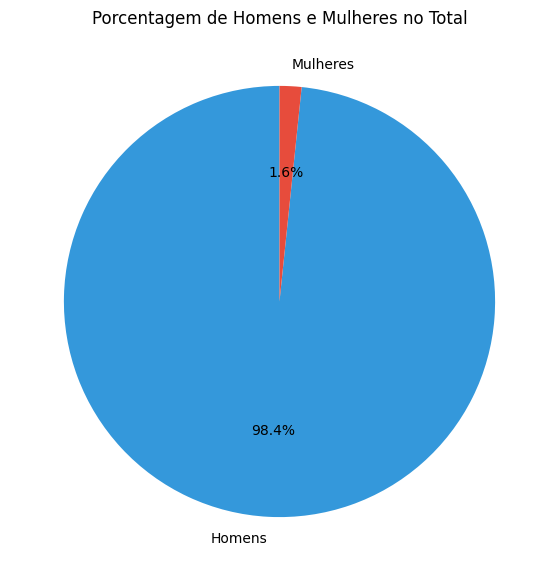

In [17]:
labels = ['Homens', 'Mulheres']
sizes = [porcentagem_homens, porcentagem_mulheres]
colors = ['#3498db', '#e74c3c']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Porcentagem de Homens e Mulheres no Total')
plt.show()

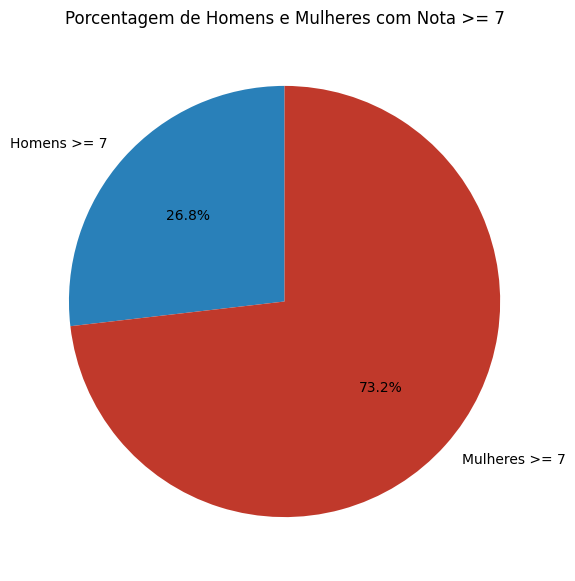

In [18]:
# Gráfico de pizza para homens e mulheres com nota >= 7, ajustado pela proporção
labels_acima_media = ['Homens >= 7', 'Mulheres >= 7']
sizes_acima_media = [porcentagem_homens_acima_media, porcentagem_mulheres_acima_media]
colors_acima_media = ['#2980b9', '#c0392b']

plt.figure(figsize=(7, 7))
plt.pie(sizes_acima_media, labels=labels_acima_media, colors=colors_acima_media, autopct='%1.1f%%', startangle=90)
plt.title('Porcentagem de Homens e Mulheres com Nota >= 7')
plt.show()

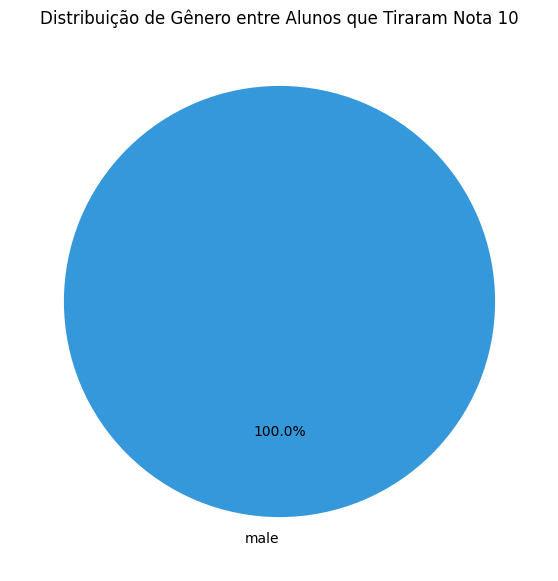

In [19]:
# Filtrar alunos que tiraram nota 10 e contar por gênero
genero_nota_10 = df[df['Nota Prova (sem peso)'] ==10]['Genero'].value_counts(normalize=True) * 100

# Gráfico de pizza
plt.figure(figsize=(7, 7))
plt.pie(genero_nota_10, labels=genero_nota_10.index, autopct='%1.1f%%', colors=['#3498db', '#e74c3c'], startangle=90)
plt.title('Distribuição de Gênero entre Alunos que Tiraram Nota 10')
plt.show()

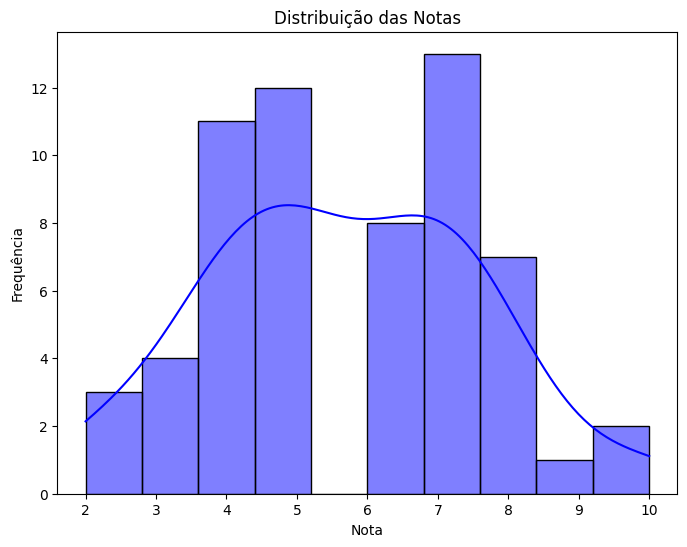

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Nota Prova (sem peso)'], bins=10, kde=True, color='blue')
plt.title('Distribuição das Notas')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()

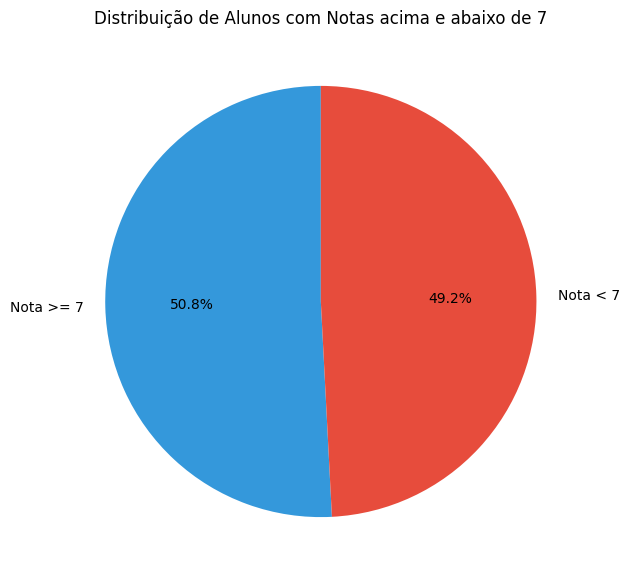

In [21]:
nota_maior_7_igual = len(df[df['Nota Prova (sem peso)'] >= media])
nota_menor_7 = len(df[df['Nota Prova (sem peso)'] < media])

# Dados para o gráfico
labels_nota_7 = ['Nota >= 7', 'Nota < 7']
sizes_nota_7 = [nota_maior_7_igual, nota_menor_7]
colors_nota_7 = ['#3498db', '#e74c3c']

# Gráfico de pizza
plt.figure(figsize=(7, 7))
plt.pie(sizes_nota_7, labels=labels_nota_7, colors=colors_nota_7, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Alunos com Notas acima e abaixo de 7')
plt.show()

In [22]:
# TreeMap das notas
bins = [0, 3, 5, 7, 8.5, 9, 10]
labels = ['0-3', '3-5', '5-7', '7-8.5', '8.5-9', '9-10']  # Rótulos para os bins

df['Faixa de Nota'] = pd.cut(df['Nota Prova (sem peso)'], bins=bins, labels=labels)
# Contar a quantidade de alunos em cada faixa de nota
df_faixa = df['Faixa de Nota'].value_counts().reset_index()
df_faixa.columns = ['Faixa de Nota', 'Número de Alunos']

fig = px.treemap(df_faixa, 
                 path=['Faixa de Nota'], 
                 values='Número de Alunos', 
                 title="Treemap de Notas dos Alunos (Nota Prova (sem peso))",
                 color='Número de Alunos',
                 color_continuous_scale='Viridis')

fig.show()

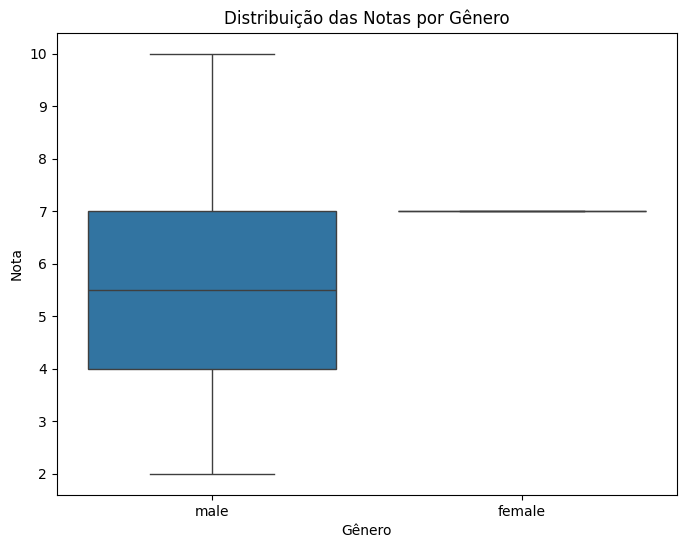

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Genero', y='Nota Prova (sem peso)', data=df)
plt.title('Distribuição das Notas por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Nota')
plt.show()